<a href="https://colab.research.google.com/github/pmargarete/CCDEPLRL_EXERCISES_COM222/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"
dataset = pd.read_json(path)

In [3]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [4]:
sentences = dataset['review'].tolist()
labels = dataset['rating'].tolist()

training_size = int(len(sentences) * 0.8)
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [5]:
# 0 negative [1-2] and 1 positive [3-5]
training_labels_binary = np.array([0 if rating in [1, 2] else 1 for rating in training_labels])
testing_labels_binary = np.array([0 if rating in [1, 2] else 1 for rating in testing_labels])


1. Tokenize the data

In [91]:
vocab_size = 3500
embedding_dim = 32
max_length = 30
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

2. Sequence the data

In [92]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

3. Pad the data

In [93]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


4. Train a sentimental model

In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_11     │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
num_epochs = 30
history = model.fit(training_padded, training_labels_binary, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels_binary))


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6961 - loss: 0.6865 - val_accuracy: 0.3234 - val_loss: 0.7329
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6938 - loss: 0.6403 - val_accuracy: 0.3234 - val_loss: 0.8459
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6952 - loss: 0.6068 - val_accuracy: 0.3234 - val_loss: 0.8604
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6901 - loss: 0.5920 - val_accuracy: 0.3234 - val_loss: 0.8443
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6849 - loss: 0.5771 - val_accuracy: 0.3234 - val_loss: 0.8570
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7161 - loss: 0.5431 - val_accuracy: 0.3234 - val_loss: 0.8449
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5205 - val_accuracy: 0.3234 - val_loss: 0.8401
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6823 - loss: 0.5083 - val_accuracy: 0.3234 - val_loss

Get files for visualing the network

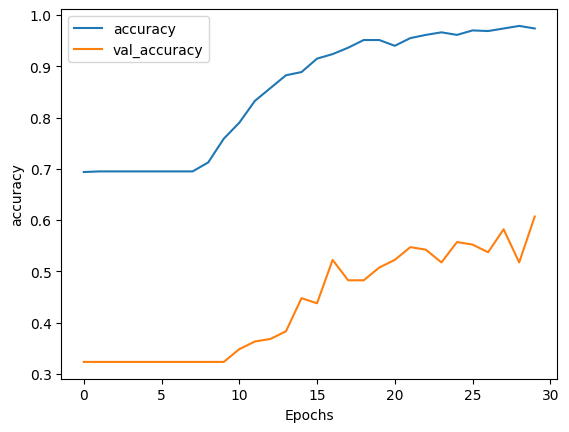

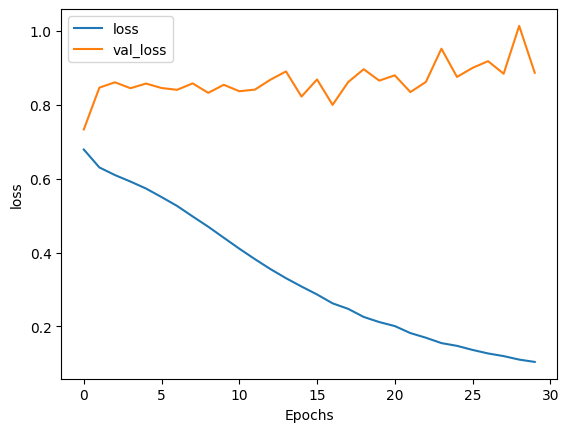

In [96]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [113]:
fake_reviews = ['ang dami mong dada wala namang sense', 'sayang walang kwenta', 'sige lang', 'mahalaga ka sa akin sana maayos ang lagay mo', 'sobrang ganda at ok']
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print("REVIEWS!!!")
classes = model.predict(fakes_padded)

for i in range(len(fake_reviews)):
    print(fake_reviews[i])
    print(f"Predicted: {classes[i][0] * 100:.2f}%")
    print('\n')

# Optional: Evaluate final model accuracy
loss, accuracy = model.evaluate(testing_padded, testing_labels_binary, verbose=0)
print(f"Overall accuracy on binary testing labels: {accuracy:.4f}")

REVIEWS!!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
ang dami mong dada wala namang sense
Predicted: 22.98%


sayang walang kwenta
Predicted: 13.00%


sige lang
Predicted: 63.92%


mahalaga ka sa akin sana maayos ang lagay mo
Predicted: 78.60%


sobrang ganda at ok
Predicted: 94.70%


Overall accuracy on binary testing labels: 0.6070
